# 01 线性回归与非线性回归

## 线性回归：

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import keras
from keras.layers import Dense
from keras.models import Sequential

Using TensorFlow backend.


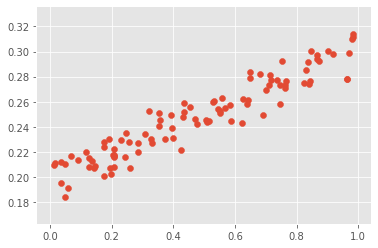

In [2]:
x_data = np.random.rand(100)
noise = np.random.normal(0, 0.01, x_data.shape)
y_data = x_data * 0.1 + 0.2 + noise

plt.scatter(x_data, y_data)

cost: 0.13131988
cost: 0.0007812974
cost: 0.0002873353
cost: 0.00015109277
cost: 0.000113514885
cost: 0.0001031503
cost: 0.0001002916
W: [[0.10058499]] b: [0.19996563]


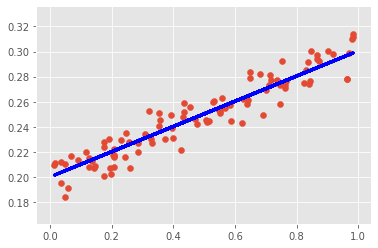

In [3]:
# 构建一个顺序模型
model = Sequential()
# 在模型中添加一个全连接层
model.add(Dense(units=1,input_dim=1))
# sgd:Stochastic gradient descent，随机梯度下降法
# mse:Mean Squared Error，均方误差
model.compile(optimizer='sgd',loss='mse')

# 训练3001个批次
for step in range(3001):
    # 每次训练一个批次
    cost = model.train_on_batch(x_data,y_data)
    # 每500个batch打印一次cost值
    if step % 500 == 0:
        print('cost:',cost)
        
# 打印权值和偏置值
W,b = model.layers[0].get_weights()
print('W:',W,'b:',b)

# x_data输入网络中，得到预测值y_pred
y_pred = model.predict(x_data)

# 显示随机点
plt.scatter(x_data,y_data)
# 显示预测结果
plt.plot(x_data,y_pred,'b',lw=3)
plt.show()

## 非线性回归：

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

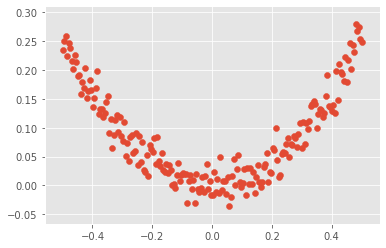

In [5]:
x_data = np.linspace(-0.5, 0.5, 200)
noise = np.random.normal(0, 0.02, x_data.shape)
y_data = np.square(x_data) + noise

plt.scatter(x_data, y_data)

cost: 0.026842315
cost: 0.004846765
cost: 0.002206212
cost: 0.016960118
cost: 0.0018053089
cost: 0.0004600119
cost: 0.00045898938


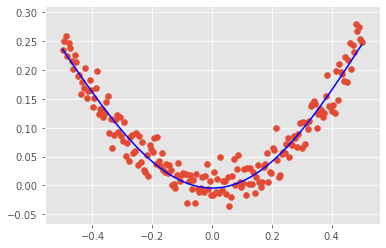

In [6]:
model = Sequential()
model.add(Dense(units=10, input_dim=1))
model.add(Activation('tanh'))
model.add(Dense(units=1))
model.add(Activation('tanh'))

sgd = SGD(lr = 0.3)
model.compile(sgd, 'mse')

for step in range(3001):
    cost = model.train_on_batch(x_data, y_data)
    
    if step % 500 == 0:
        print('cost:', cost)
        
y_pred = model.predict(x_data)
plt.scatter(x_data, y_data)
plt.plot(x_data, y_pred, 'b')

### Mnist 数据集

In [7]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam
from keras.regularizers import l2

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('x_shape:', x_train.shape)
print('y_shape:', y_train.shape)
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
# one hot 编码
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

x_shape: (60000, 28, 28)
y_shape: (60000,)


In [9]:
# 创建模型
model = Sequential([
        Dense(units=200,input_dim=784,bias_initializer='one',activation='tanh'), # 可以增加正则项
        # Dense(units=200,input_dim=784,bias_initializer='one',activation='tanh',kernel_regularizer=l2(0.0003)),
        Dropout(0.4),
        Dense(units=100,bias_initializer='one',activation='tanh'),
        Dropout(0.4),
        Dense(units=10,bias_initializer='one',activation='softmax')
    ])

# 定义优化器
sgd = SGD(lr=0.2)
adam = Adam(lr=0.001)
# 定义优化器，loss function，训练过程中计算准确率
model.compile(
    optimizer = adam,
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

# 训练模型
model.fit(x_train,y_train,batch_size=32,epochs=10)

# 评估模型
loss,accuracy = model.evaluate(x_test,y_test)
print('\ntest loss',loss)
print('test accuracy',accuracy)

loss,accuracy = model.evaluate(x_train,y_train)
print('train loss',loss)
print('train accuracy',accuracy)

Epoch 1/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.4261 - acc: 0.8688
Epoch 2/10
60000/60000 [==============================] - 9s 158us/step - loss: 0.2543 - acc: 0.9237
Epoch 3/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.2105 - acc: 0.9378
Epoch 4/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.1850 - acc: 0.9445
Epoch 5/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.1667 - acc: 0.9503
Epoch 6/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.1544 - acc: 0.9541
Epoch 7/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.1413 - acc: 0.9572
Epoch 8/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.1369 - acc: 0.9586
Epoch 9/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.1282 - acc: 0.9613
Epoch 10/10
10000/10000 [==============================] - 1s 56us/step

test loss 0